In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("customer_segmentation.csv")

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.shape

(2240, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
# df.isna()
# df.isna().sum()
df.isna().sum().sum()

24

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum().sum()

0

In [11]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,...,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,...,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,...,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [12]:
df["Education"].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

In [13]:
df["Marital_Status"].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [14]:
#data cleaning and feature engineering
df["Dt_Customer"] = pd.to_datetime(df['Dt_Customer'],dayfirst=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   object        
 3   Marital_Status       2216 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   MntWines             2216 non-null   int64         
 10  MntFruits            2216 non-null   int64         
 11  MntMeatProducts      2216 non-null   int64         
 12  MntFishProducts      2216 non-null   int64         
 13  MntSweetProducts     2216 non-null   i

In [16]:
df["Age"] = 2025 - df["Year_Birth"]

In [17]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


In [18]:
df["Total_children"] = df["Kidhome"]+df["Teenhome"]

In [19]:
df["Total_children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Total_children, Length: 2216, dtype: int64

In [29]:
spending_cols = ['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']

In [30]:
df['Total_spending'] = df[spending_cols].sum(axis=1)

In [31]:
df['Total_spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_spending, Length: 2216, dtype: int64

In [32]:
df['customer_since'] = (pd.Timestamp("today")-df["Dt_Customer"]).dt.days

In [33]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children', 'Total_spending', 'customer_since'],
      dtype='object')

Text(0.5, 1.0, 'Age Distribution')

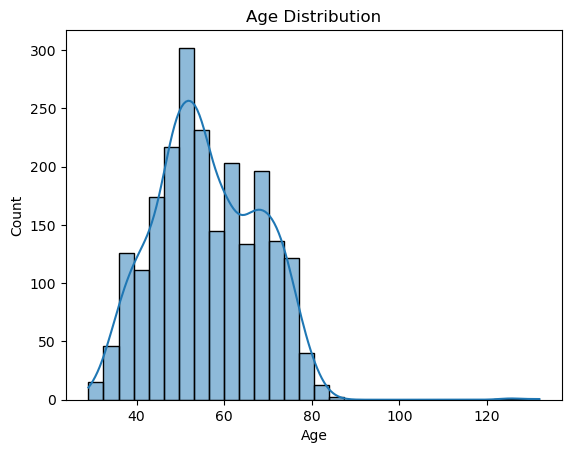

In [34]:
sns.histplot(df["Age"],bins = 30, kde=True)
plt.title("Age Distribution")

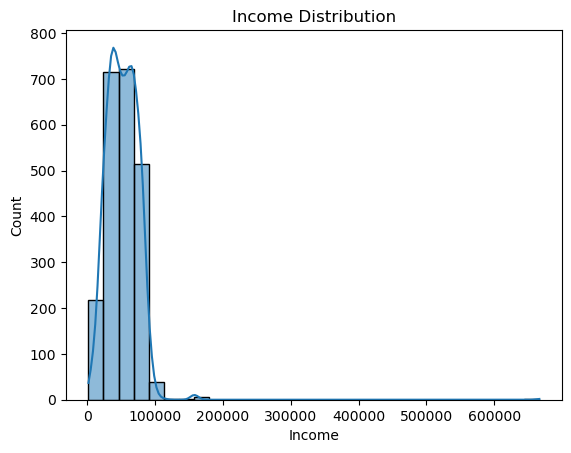

In [ ]:
sns.histplot(df["Income"],bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

Text(0.5, 1.0, 'Total Spending Distribution')

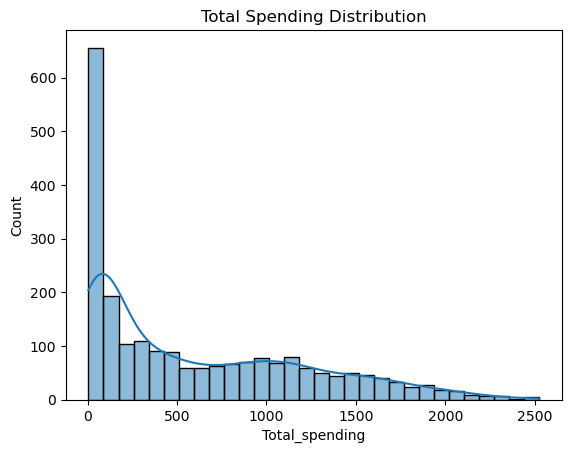

In [ ]:
sns.histplot(df["Total_spending"],bins=30,kde=True)
plt.title("Total Spending Distribution")

Text(0.5, 1.0, 'Income Vs Education level')

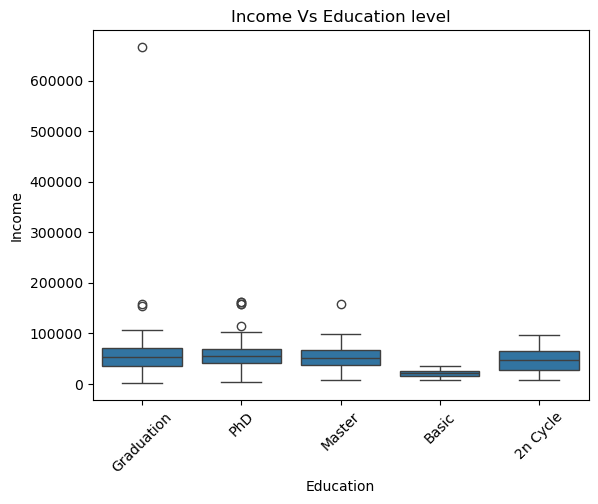

In [ ]:
sns.boxplot(x="Education",y="Income",data=df)
plt.xticks(rotation=45)
plt.title("Income Vs Education level")

Text(0.5, 1.0, 'MaritalStatus Vs Income')

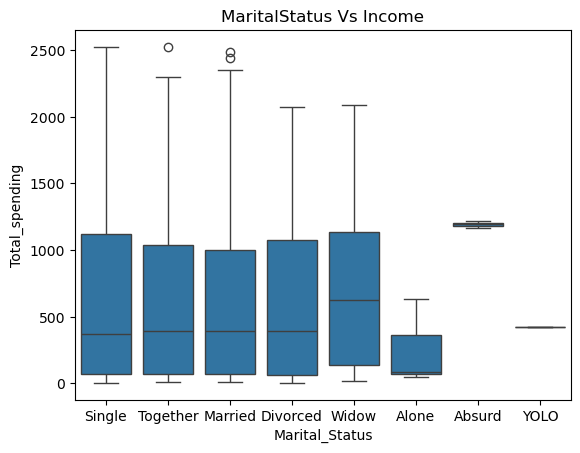

In [ ]:
sns.boxplot(x="Marital_Status",y="Total_spending",data=df)
plt.title("MaritalStatus Vs Income")

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'age', 'Total_children', 'Total_spending', 'customer_since', 'Age'],
      dtype='object')

In [ ]:
corr = df[["Income","Age","Recency","Total_spending","NumWebPurchases","NumStorePurchases"]].corr()

In [ ]:
corr

,Income,Age,Recency,Total_spending,NumWebPurchases,NumStorePurchases
Income,1.000000,0.161791,-0.003970,0.667576,0.387878,0.529362
Age,0.161791,1.000000,0.016295,0.113487,0.153051,0.127891
Recency,-0.003970,0.016295,1.000000,0.020066,-0.005641,-0.000434
Total_spending,0.667576,0.113487,0.020066,1.000000,0.528973,0.675181
NumWebPurchases,0.387878,0.153051,-0.005641,0.528973,1.000000,0.516240
NumStorePurchases,0.529362,0.127891,-0.000434,0.675181,0.516240,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

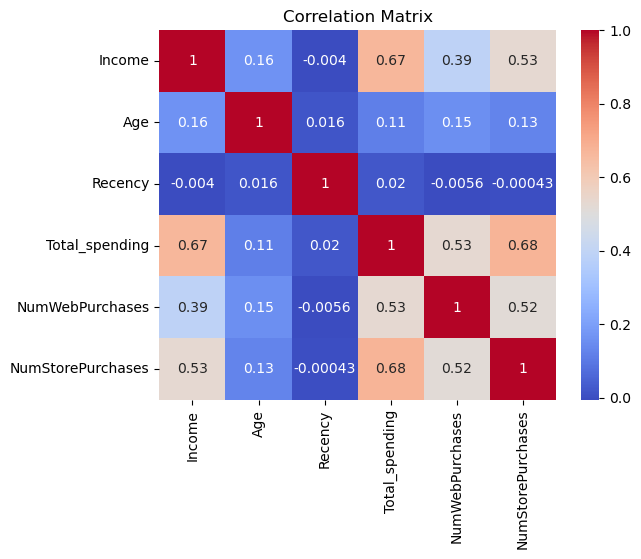

In [ ]:
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")

In [ ]:
pivot_income = df.pivot_table(values="Income",index="Education",columns="Marital_Status",aggfunc="mean")


In [ ]:
pivot_income

Marital_Status,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
Education,,,,,,,,
2n Cycle,NaN,NaN,49395.130435,46201.100000,53673.944444,44736.410714,51392.200000,NaN
Basic,NaN,NaN,9548.000000,21960.500000,18238.666667,21240.071429,22123.000000,NaN
Graduation,79244.0,34176.0,54526.042017,50800.258741,51322.182927,55758.480702,54976.657143,NaN
Master,65487.0,61331.0,50331.945946,53286.028986,53530.560000,52109.009804,58401.545455,NaN
PhD,NaN,35860.0,53096.615385,58138.031579,53314.614583,56041.422414,60288.083333,48432.0


Text(0.5, 1.0, 'Average Income by Marital Status and Education')

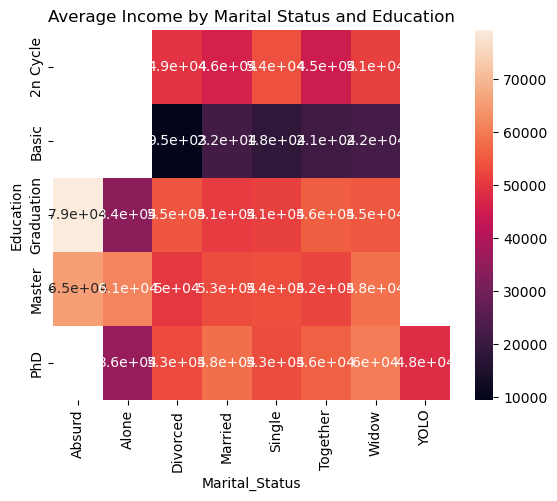

In [ ]:
sns.heatmap(pivot_income,annot=True)
plt.title("Average Income by Marital Status and Education")

In [ ]:
group1 = df.groupby("Education")["Total_spending"].mean().sort_values(ascending=False)


In [ ]:
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: Total_spending, dtype: float64

Text(0, 0.5, 'Average Total Spending')

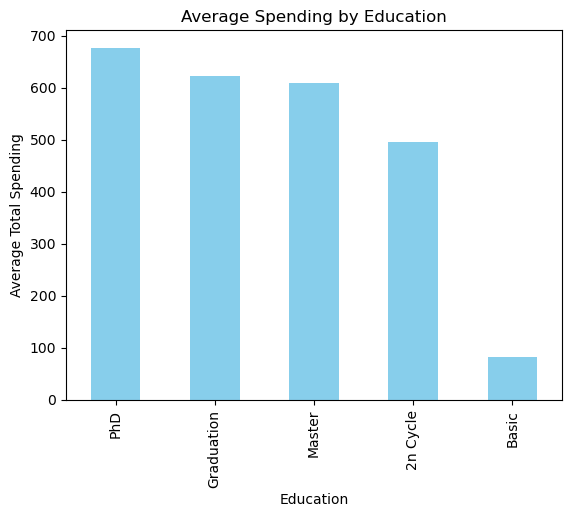

In [ ]:
group1.plot(kind="bar",color="skyblue")
plt.title("Average Spending by Education")
plt.ylabel("Average Total Spending")

In [ ]:
df["AcceptedAny"]=df[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response"]].sum(axis=1)

In [ ]:
df["AcceptedAny"].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [ ]:
df["AcceptedAny"]=df["AcceptedAny"].apply(lambda x: 1 if x>0 else 0)

In [ ]:
df["AcceptedAny"].unique()

array([1, 0], dtype=int64)

In [ ]:
group2 = df.groupby("Marital_Status")["AcceptedAny"].mean().sort_values(ascending=False)

In [ ]:
group2

Marital_Status
Absurd      0.500000
YOLO        0.500000
Widow       0.342105
Alone       0.333333
Single      0.312102
Divorced    0.297414
Married     0.252042
Together    0.251309
Name: AcceptedAny, dtype: float64

Text(0, 0.5, 'Acceptence Rate')

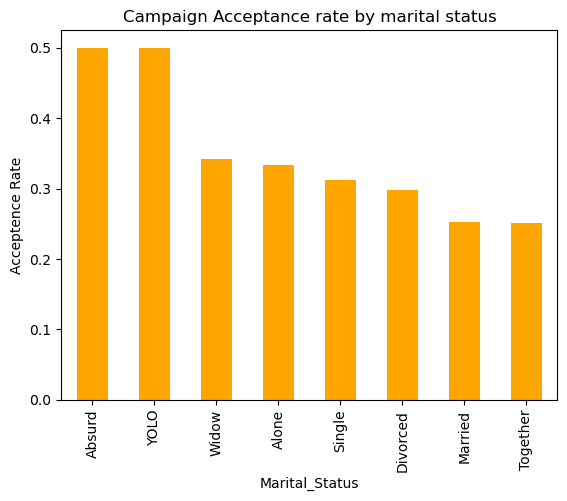

In [ ]:
group2.plot(kind="bar",color="orange")
plt.title("Campaign Acceptance rate by marital status")
plt.ylabel("Acceptence Rate")

In [ ]:
#Average Income by age
bins = [18, 30,40,50,60,70,90]


In [ ]:
labels = ["18-29","30-39","40-49","50-59","60-69","70+"]

In [ ]:
df["AgeGroup"] = pd.cut(df["Age"],bins= bins,labels=labels)

In [ ]:
group3 = df.groupby("AgeGroup")["Income"].mean()

C:\Users\manas\AppData\Local\Temp\ipykernel_2784\1140876350.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group3 = df.groupby("AgeGroup")["Income"].mean()


In [ ]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

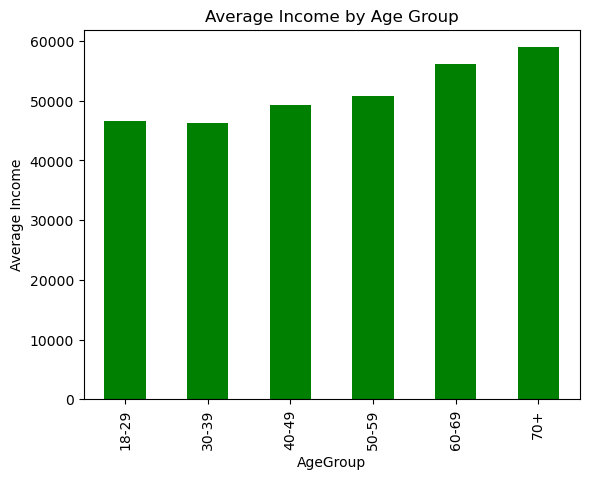

In [ ]:
group3.plot(kind="bar",color="green")
plt.title("Average Income by Age Group")
plt.ylabel("Average Income")
plt.show()

In [21]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,68,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,71,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,60,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,41,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,44,1


In [22]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Total_children'],
      dtype='object')

In [27]:
features = ["Age","Income","Total_spending","NumWebPurchases","NumStorePurchases","NumWebVisitsMonth"]

In [35]:
X = df[features].copy()

In [36]:
X

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
0,68,58138.0,1617,8,4,7
1,71,46344.0,27,1,2,5
2,60,71613.0,776,8,10,4
3,41,26646.0,53,2,4,6
4,44,58293.0,422,5,6,5
...,...,...,...,...,...,...
2235,58,61223.0,1341,9,4,5
2236,79,64014.0,444,8,5,7
2237,44,56981.0,1241,2,13,6
2238,69,69245.0,843,6,10,3


In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_scaled = scaler.fit_transform(X)

In [41]:
X_scaled

array([[ 0.98644293,  0.2340627 ,  1.67548812,  1.42855332, -0.55414289,
         0.69323197],
       [ 1.23680074, -0.23455948, -0.96235832, -1.12588116, -1.16951781,
        -0.1315745 ],
       [ 0.31882209,  0.76947764,  0.28024985,  1.42855332,  1.29198186,
        -0.54397773],
       ...,
       [-1.01641959,  0.18809052,  1.05169551, -0.76096195,  2.21504423,
         0.28082874],
       [ 1.06989553,  0.67538765,  0.39140438,  0.6987149 ,  1.29198186,
        -0.95638097],
       [ 1.23680074,  0.02470453, -0.7218    , -0.39604274, -0.55414289,
         0.69323197]])

In [43]:
from sklearn.cluster import KMeans


In [44]:
wcss = []

In [45]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

In [46]:
wcss

[8002.829337351306,
 6798.54546688248,
 6184.8452800023615,
 5487.485809948277,
 5128.762704451913,
 4888.162075981328,
 4594.313654242203,
 4466.9516051852825]

Text(0, 0.5, 'WCSS')

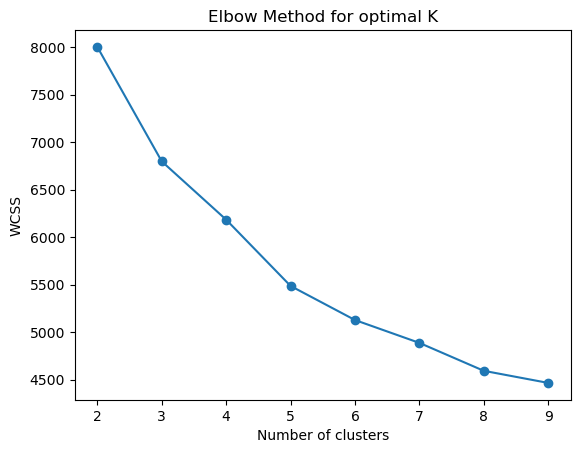

In [47]:
plt.plot(range(2,10),wcss,marker="o")
plt.title("Elbow Method for optimal K")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")

In [48]:
kmeans = KMeans(n_clusters=6)
df["Cluster"] = kmeans.fit_predict(X_scaled)

In [49]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_children,Total_spending,customer_since,Cluster
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,68,0,1617,4736,4
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,71,2,27,4186,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,60,0,776,4385,4
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,41,1,53,4212,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,44,1,422,4234,4


In [50]:
cluster_summary = df.groupby("Cluster")[features].mean()

In [51]:
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,
0,65.637002,42292.042155,155.175644,2.437939,3.861827,5.531616
1,46.109792,76262.688427,1294.456973,4.655786,8.575668,2.703264
2,69.247788,73295.244838,1196.646018,4.687316,8.646018,2.823009
3,47.238235,31036.550000,100.477941,2.145588,3.077941,6.994118
4,58.525463,58801.094907,853.557870,7.851852,7.613426,6.469907
5,48.000000,666666.000000,62.000000,3.000000,3.000000,6.000000


In [53]:
df["Cluster"].value_counts()

Cluster
3    680
4    432
0    427
2    339
1    337
5      1
Name: count, dtype: int64

In [54]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df["PCA"], df["PCA2"] = pca_data[:,0],pca_data[:,1]

In [55]:
pca_data

array([[ 1.1051798 ,  1.63021086],
       [-1.3340086 , -0.2097081 ],
       [ 1.88841354,  0.63959163],
       ...,
       [ 1.1427021 , -0.66746009],
       [ 1.89843476,  0.30996359],
       [-0.8395238 ,  0.72707899]])

In [56]:
df["PCA2"]

0       1.630211
1      -0.209708
2       0.639592
3      -0.717599
4      -0.383926
          ...   
2235    0.952250
2236    2.085213
2237   -0.667460
2238    0.309964
2239    0.727079
Name: PCA2, Length: 2216, dtype: float64

Text(0.5, 1.0, 'Customer Segmentation (PCA)')

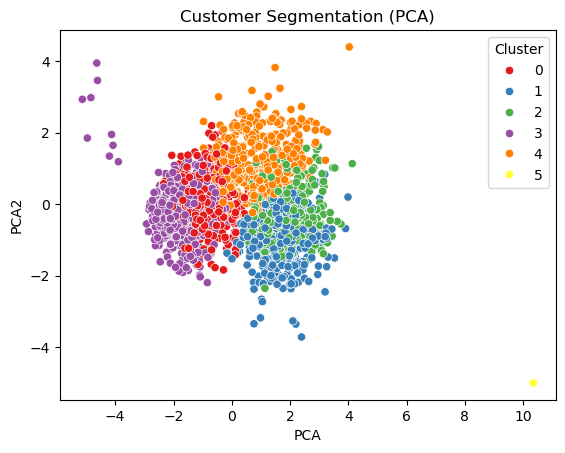

In [57]:
sns.scatterplot(x="PCA",y="PCA2",hue="Cluster",data=df,palette="Set1")
plt.title("Customer Segmentation (PCA)")

In [58]:
cluster_summary

,Age,Income,Total_spending,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth
Cluster,,,,,,
0,65.637002,42292.042155,155.175644,2.437939,3.861827,5.531616
1,46.109792,76262.688427,1294.456973,4.655786,8.575668,2.703264
2,69.247788,73295.244838,1196.646018,4.687316,8.646018,2.823009
3,47.238235,31036.550000,100.477941,2.145588,3.077941,6.994118
4,58.525463,58801.094907,853.557870,7.851852,7.613426,6.469907
5,48.000000,666666.000000,62.000000,3.000000,3.000000,6.000000


In [59]:
import joblib

In [62]:
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']